In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#calling this function creates a datasets/housing directory in my workspace,downloads the
#housing.tgz file and from that extracts the housing.tgz file in this directory

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    

In [3]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    
    #pd.read_csv reads csv into pandas DataFrame which we are using here
    #https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
    return pd.read_csv(csv_path) 



In [4]:
housing = load_housing_data()

#gives te top five rows of the pandas data frame object
#each row represents one district
housing.head() 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
import numpy as np

In [8]:
#adding an "income_cat" attribute to housing
#pandas.cut() takes the values from the "median_income" column, 
#https://pandas.pydata.org/docs/reference/api/pandas.cut.html
housing["income_cat"] = pd.cut(
                               #1D input array to be binned
                               housing["median_income"], 
                               #bins = sequence of scalars : defines bin edges allowing for non-uniform width
                               bins = [0, 1.5, 3, 4.5, 6, np.inf], 
                               #specifies the labels for the returned bins
                               labels = [1, 2, 3, 4, 5]
                        )


<Axes: >

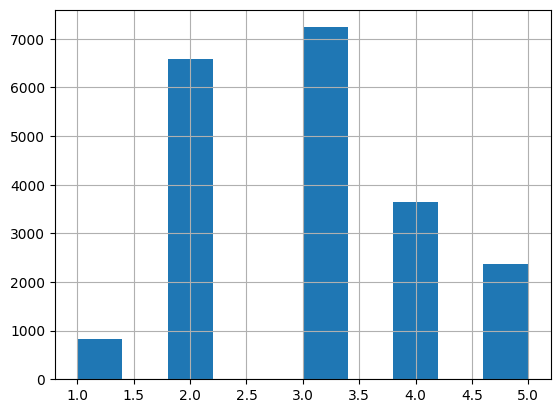

In [9]:
#gives a histogram of the categories that we have now
housing["income_cat"].hist()

<Axes: xlabel='longitude', ylabel='latitude'>

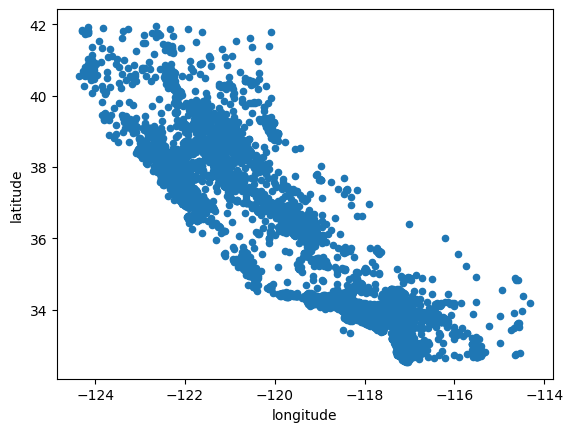

In [14]:
#getting the copy to not harm the original train set
#if the dataset is very large, it is also an option to sample an exploration set (a stratified subset)
housing = strat_train_set.copy()

"""due to the fact that we are working with geographical data we can nicely plot a scatterplot along the axes of 
longitude and latitude - resulting in a data cloud shaped like california."""

housing.plot(kind = "scatter", x = "longitude", y = "latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

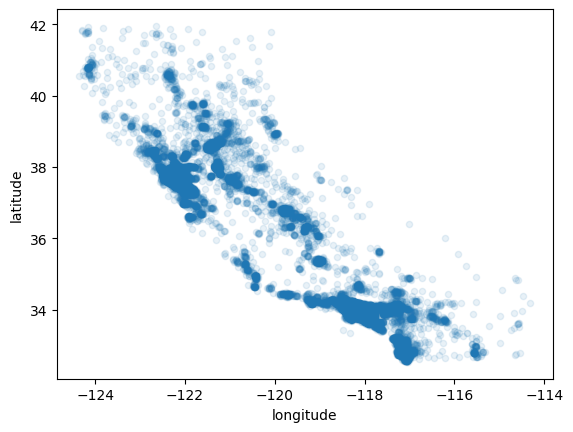

In [15]:
#setting alpha parameter (transparency) in order to better visualize density
#playing aroud with visualization parameters is great way to explore and find patterns
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

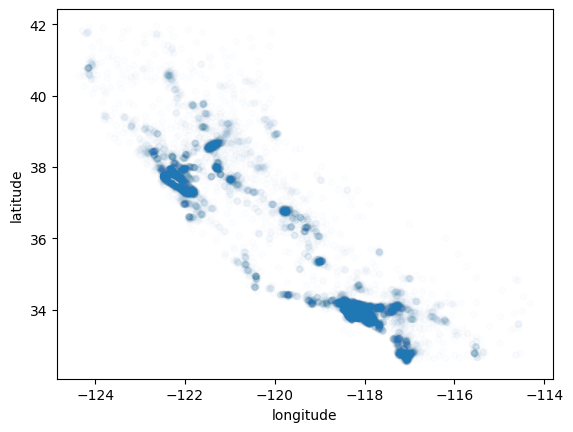

In [16]:
#OWN
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.01)

In [19]:
import matplotlib.pyplot as plt


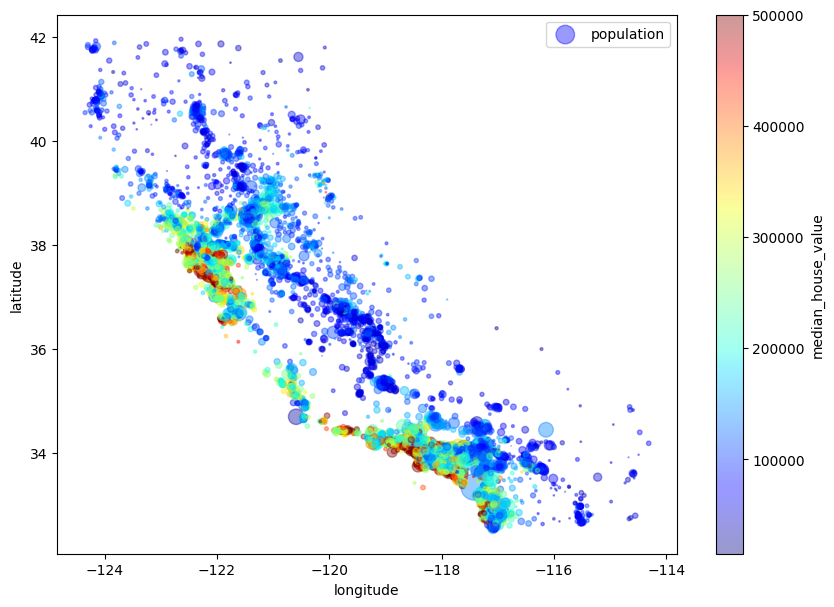

In [20]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
             #option s makes size of each circle represent the districts population size
             s = housing["population"]/100, label = "population", figsize = (10,7),
             #option c makes the colors represent the prices
             #for this we use predefinded colormap "jet" raning from low (blue) to high prices(red)
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True
)

plt.legend()